In [38]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download("punkt")

# Settings
pd.set_option('display.max_colwidth', 200)
sns.set(style="whitegrid")

[nltk_data] Downloading package punkt to C:\Users\ASUS-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
# Load your cleaned dataset
DATA_PATH = r"C:\Users\ASUS-PC\Desktop\mindcheck_ai_jupyter\data\aimind_cleaned.csv"
df = pd.read_csv(DATA_PATH)

# Preview data
print(" Dataset Loaded:")
display(df.head())

 Dataset Loaded:


C:\Users\ASUS-PC\AppData\Local\Temp\ipykernel_10228\2212051679.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH)


,confession,label,upvote_ratio,clean_text
0,"New to Vyvanse... Do others get a heady rush from it, is this a common side effect?",ADHD,1,new to vyvanse do others get a heady rush from it is this a common side effect
1,why FUCK is a mental illness supposed to stay for more than 1 year?,OCD,1,why fuck is a mental illness supposed to stay for more than year
2,PTSD? Hello. Sorry for my bad english but I just wanna know if PSTD from your past relationships can be triggered by your new relationship? And am I experiencing PTSD?\n\nI've been with my girlfri...,ptsd,1,ptsd hello sorry for my bad english but i just wanna know if pstd from your past relationships can be triggered by your new relationship and am i experiencing ptsd ive been with my girlfriend for ...
3,"Found mould in my home Hi all, contamination OCD is a big problem for me and something I’m working on. Sadly, I discovered mould growing in my bedroom wardrobe and it has got me into overthinking ...",OCD,0.78,found mould in my home hi all contamination ocd is a big problem for me and something im working on sadly i discovered mould growing in my bedroom wardrobe and it has got me into overthinking mode...
4,Honestly I wanna die.,depression,1,honestly i wanna die


In [40]:
# Text cleaning function
def clean_text(text):
    if pd.isna(text): return ""
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)         # Remove URLs
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)         # Remove punctuation
    text = re.sub(r"\s+", " ", text)                   # Normalize spaces
    return text.strip()

# Apply to confession column
df["clean_text"] = df["confession"].apply(clean_text)

# Drop rows with blank clean_text
df = df[df["clean_text"].str.strip().astype(bool)]

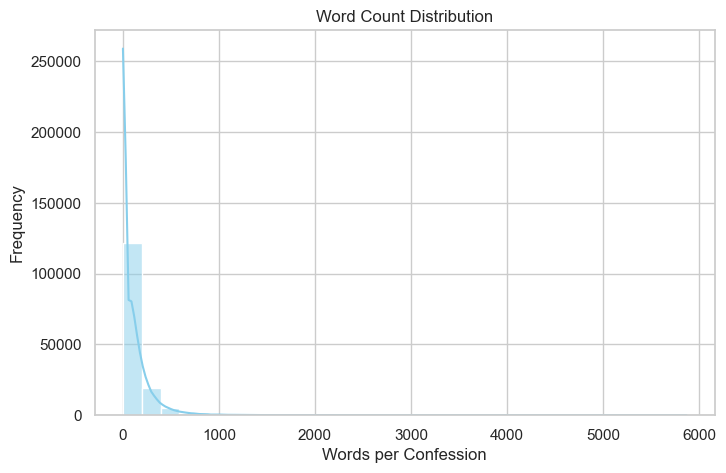

In [41]:
# Plot: Word Count Histogram (optional)
df["word_count"] = df["clean_text"].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
sns.histplot(df["word_count"], bins=30, kde=True, color="skyblue")
plt.title("Word Count Distribution")
plt.xlabel("Words per Confession")
plt.ylabel("Frequency")
plt.show()

C:\Users\ASUS-PC\AppData\Local\Temp\ipykernel_10228\3027717474.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", order=df["label"].value_counts().index, palette="viridis")


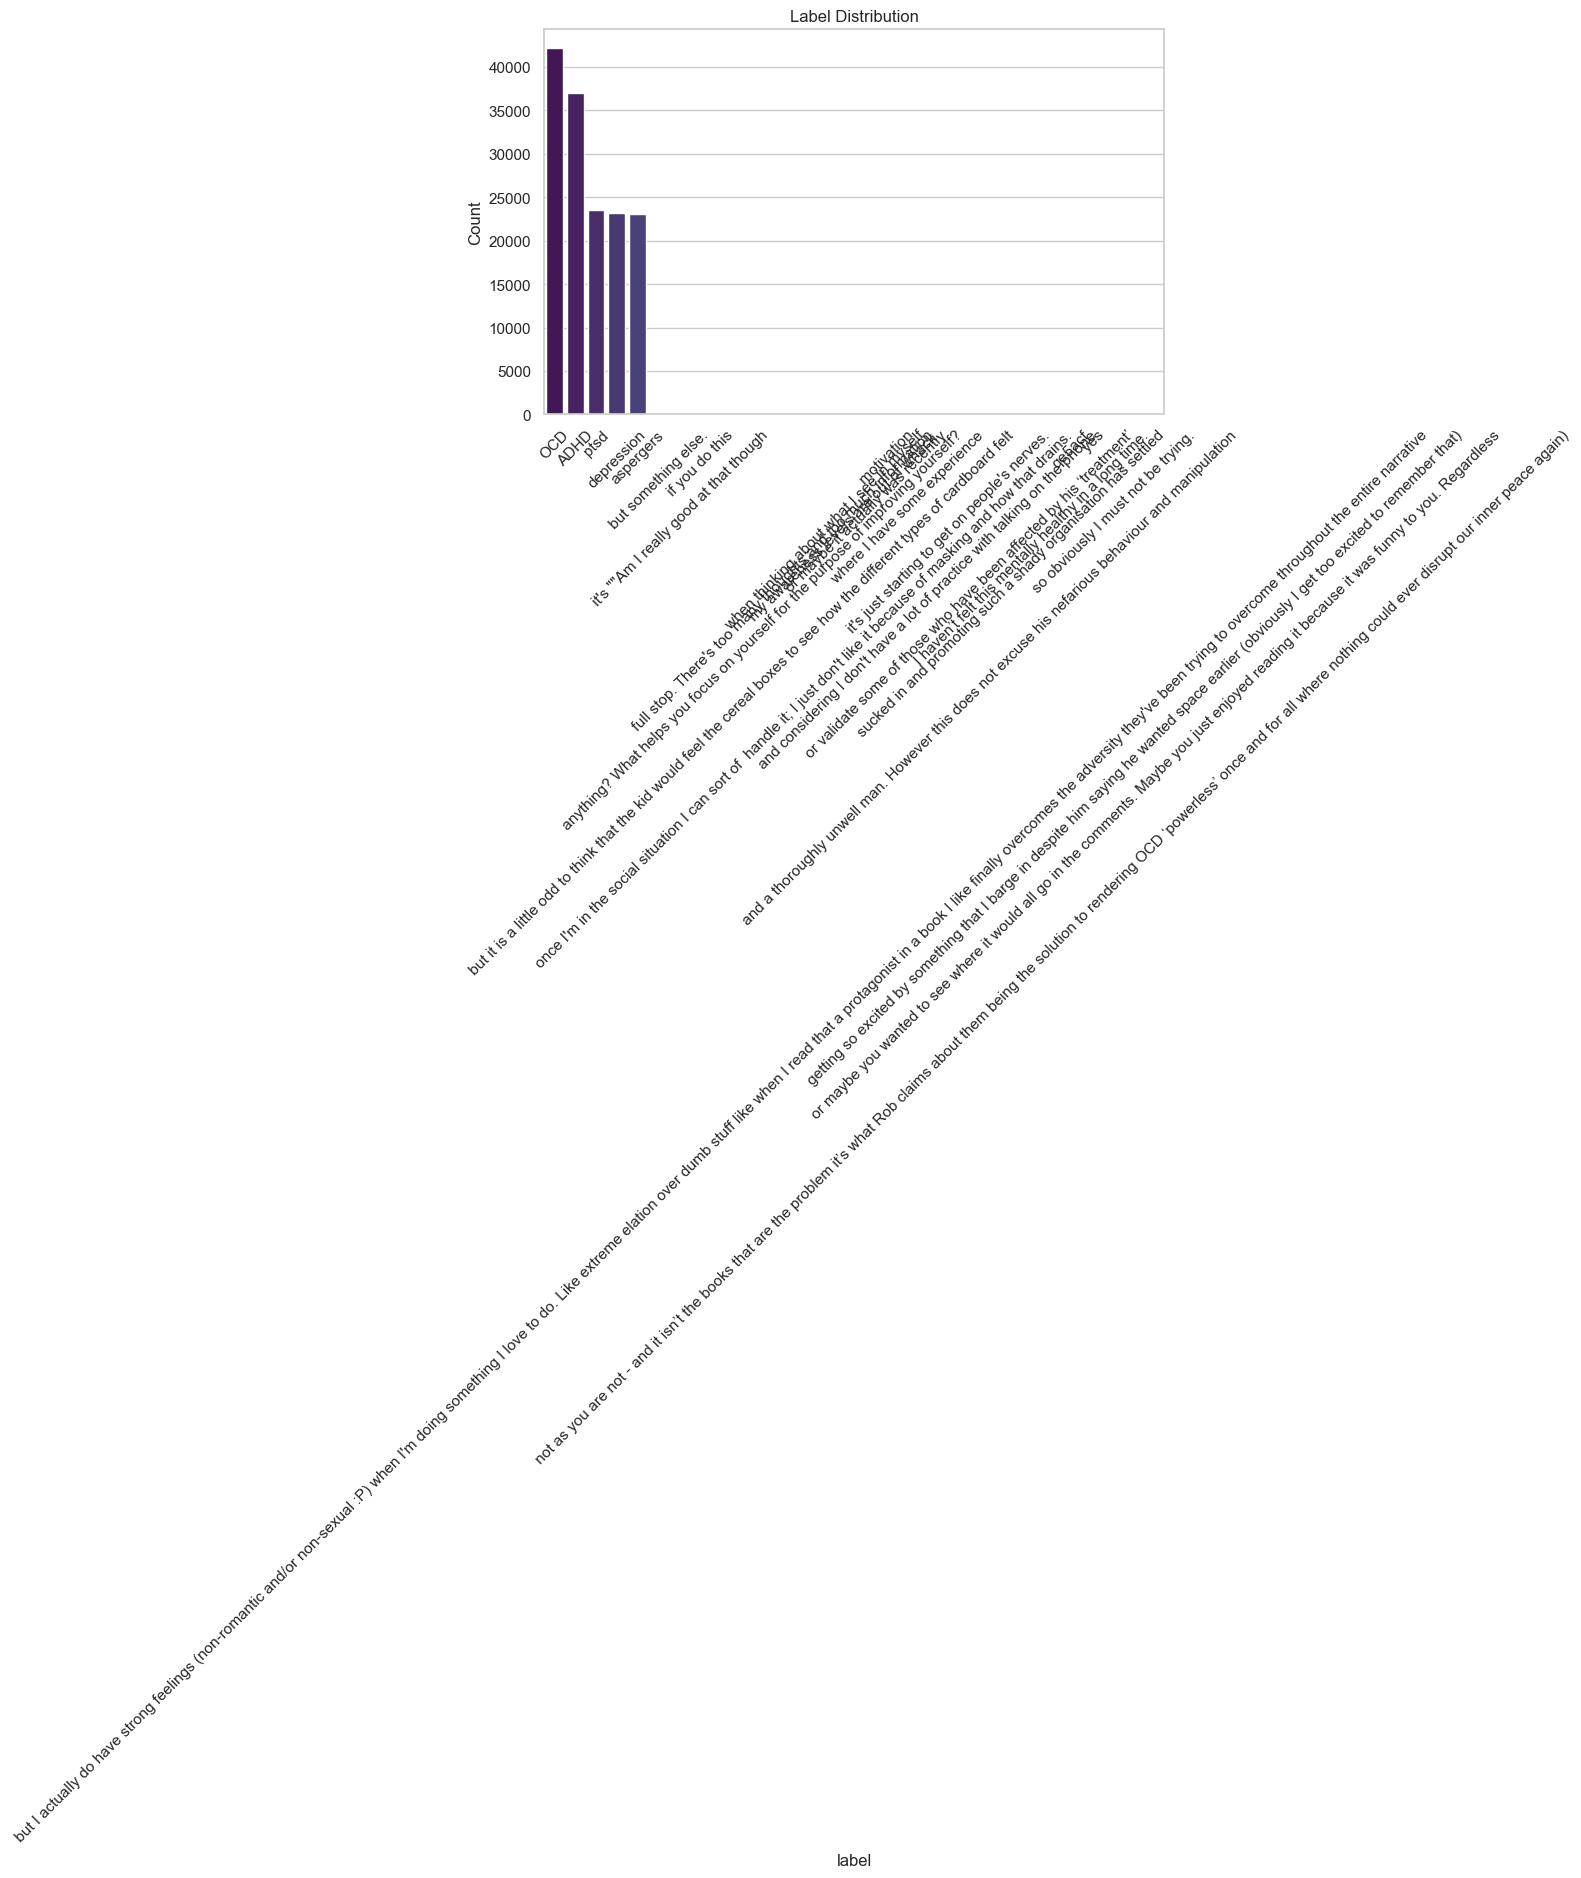

In [42]:
# Label distribution
if "label" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x="label", order=df["label"].value_counts().index, palette="viridis")
    plt.title("Label Distribution")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.show()
else:
    print("⚠️ No 'label' column found — skipping class distribution.")


In [43]:
# Upvote = public reaction score (intensity of confession)
if "upvote" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df["upvote"], bins=20, kde=True, color="purple")
    plt.title("Upvote Score Distribution")
    plt.xlabel("Upvote Score (0 to 1)")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("⚠️ No 'upvote' column found.")


⚠️ No 'upvote' column found.


In [44]:
# Save for next step
SAVE_PATH = r"C:\Users\ASUS-PC\Desktop\mindcheck_ai_jupyter\data\processed_clean_data.csv"
df.to_csv(SAVE_PATH, index=False)
print(f"✅ Final cleaned data saved to: {SAVE_PATH}")

✅ Final cleaned data saved to: C:\Users\ASUS-PC\Desktop\mindcheck_ai_jupyter\data\processed_clean_data.csv
